<a href="https://colab.research.google.com/github/EPatha/Detection_liver-disease/blob/main/Best-Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://dinus.ac.id/wp-content/uploads/2024/11/Logo-Web-Udinus-Putih.png"  width="400">


# BK Associate Data Scientist - Teknik Informatika S1 - 'TANGGAL' 2025
</center>

PANDUAN:
- **WAJIB MENGISI SEMUA UNIT**
- DIPERBOLEHKAN MEMBUKA FILE LAMPAU, TAPI TIDAK BOLEH MENGGUNAKAN CHATGPT, GEMINI, CLAUDE, DAN LLM LAINNYA
- JIKA SUDAH SELESAI, SILAKAN MENGABARI TIM ASISTEN UNTUK DISKUSI JADWAL PRESENTASI

# Latar Belakang Masalah
Penyakit hati (*liver disease*) merupakan salah satu penyebab utama morbiditas dan mortalitas di seluruh dunia, terutama di negara-negara berkembang seperti India. Deteksi dini dan diagnosis penyakit hati sangat penting untuk mencegah komplikasi serius dan meningkatkan peluang kesembuhan pasien. Namun, keterbatasan sumber daya medis serta kompleksitas data klinis menjadi tantangan dalam proses diagnosis yang cepat dan akurat.

Indian Liver Patient Dataset (ILPD) menyediakan data klinis dari pasien yang berasal dari India, dan bertujuan untuk membantu pengembangan sistem prediksi penyakit hati berdasarkan parameter medis. Dengan menganalisis data ini, dapat dibangun model prediksi yang efisien untuk mendeteksi pasien yang berisiko terkena penyakit hati.

Paper Reference: [Tabular Data Generation to Improve Classification of Liver Disease Diagnosis](https://www.mdpi.com/2076-3417/13/4/2678)





# Tujuan Analisis Dataset
Tujuan utama dari analisis dataset ini adalah:
1. **Mengidentifikasi variabel kunci** yang memengaruhi risiko terkena penyakit hati.
2. **Membangun model prediktif** yang dapat membantu memprediksi penyakit hati pada pasien.

Dengan hasil analisis ini, diharapkan dataset dapat memberikan wawasan yang berharga kepada rumah sakit, tenaga medis, dan pembuat kebijakan dalam mengurangi penyakit hati.

# Terkait Dataset
- **Sumber Data**: [UCI Machine Learning Repository – Indian Liver Patient Dataset](https://archive.ics.uci.edu/dataset/225/ilpd+indian+liver+patient+dataset)
- **Jumlah Sampel Data**: 583 pasien
- **Jumlah Atribut**: 10 atribut, meliputi: age, gender, total Bilirubin, direct Bilirubin, total proteins, albumin, A/G ratio, SGPT, SGOT and Alkphos.
- **Label**: 2 (0 = pasien yang memiliki penyakit hati, 1 = pasien yang tidak memiliki penyakit hati).

# Pendekatan Analisis
Untuk mendukung analisis dataset ini, akan dibuat skema komparasi model prediksi yang dilakukan dengan 2 pendekatan berbeda:

1. **Menggunakan SMOTE**: Model akan dibangun dengan memanfaatkan data hasil augmentasi menggunakan Synthetic Minority Oversampling Technique (SMOTE) untuk menangani ketidakseimbangan kelas pada dataset dan meningkatkan performa klasifikasi penyakit hati.

2. **Menggunakan Augmentasi GAN**: Model juga akan dibangun dengan menggunakan data sintetis yang dihasilkan melalui Generative Adversarial Networks (GAN), untuk mengevaluasi apakah metode generatif ini dapat menghasilkan data yang lebih representatif dan meningkatkan generalisasi model.

Studi ini berfokus pada dataset yang terdiri dari 583 data pasien liver yang dikumpulkan di India, dan bertujuan untuk membandingkan efektivitas dua pendekatan augmentasi data yaitu SMOTE vs GAN dalam meningkatkan performa model klasifikasi penyakit hati.



## BAB 1 - (J.62DMI00.004.1) Mengumpulkan data
- Load Data dan Ganti nama kolom yang masih berupa index dan ganti menjadi berikut pada dataframe :


*    'age', 'gender', 'tb', 'db', 'alkphos', 'sgpt', 'sgot',
       'tp', 'alb', 'a/g ratio', 'selector'




### Load Libary

In [ ]:
# Import Library
!pip install ctgan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from ctgan import CTGAN
from sklearn.metrics import accuracy_score

### Load Dataset

In [ ]:
# Load Dataset
df = pd.read_csv('/content/Indian Liver Patient Dataset (ILPD).csv', header=None)

In [ ]:
# cek nama kolom
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

Perhatikan nama kolom pada dataset. Gantilah nama-nama kolom yang masih berupa indeks (angka) dengan nama-nama fitur yang sesuai, yaitu: 'age', 'gender', 'tb', 'db', 'alkphos', 'sgpt', 'sgot', 'tp', 'alb', 'a/g ratio', dan 'selector'.

In [ ]:
cols =['age', 'gender', 'tb', 'db', 'alkphos', 'sgpt', 'sgot',
       'tp', 'alb', 'a/g ratio', 'selector']

# Mengganti nama kolom dataframe dengan cols
df.columns = cols

## BAB 2 – (J.62DMI00.005.1) Menelaah data

### Mengecek Value

In [ ]:
# Menampilkan data setelah nama kolom berhasil diganti. (5 kolom teratas)
df.head()

,age,gender,tb,db,alkphos,sgpt,sgot,tp,alb,a/g ratio,selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


- Pada tahap ini, kita akan menelaah data yang ada pada dataset `Liver Patient Dataset (ILPD)`. Kita akan melihat informasi data, statistik deskriptif, dan distribusi data.

In [ ]:
# Menampilkan data setelah nama kolom berhasil diganti. (5 kolom terbawah)
df.tail()

,age,gender,tb,db,alkphos,sgpt,sgot,tp,alb,a/g ratio,selector
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


### Melihat dimensi

In [ ]:
df.shape

(583, 11)

### Melihat informasi dataset

In [ ]:
# Melihat Informasi Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        583 non-null    int64  
 1   gender     583 non-null    object 
 2   tb         583 non-null    float64
 3   db         583 non-null    float64
 4   alkphos    583 non-null    int64  
 5   sgpt       583 non-null    int64  
 6   sgot       583 non-null    int64  
 7   tp         583 non-null    float64
 8   alb        583 non-null    float64
 9   a/g ratio  579 non-null    float64
 10  selector   583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


### Melihat deskripsi statistik

In [ ]:
# Melihat Deskripsi statistik
df.describe()

,age,tb,db,alkphos,sgpt,sgot,tp,alb,a/g ratio,selector
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


### Melihat persebaran data

In [ ]:
# menampilkan diagram histplot untuk telaah semua feature
# untuk visual Numerik Histoplot
df.hist(figsize=(15, 15))
plt.show()

In [ ]:
# membuat fungsi untuk melakukan observasi pada dataset
def grab_col_names(dataframe, cat_th = 10, car_th = 20): #  memisahkan kolom dalam dataset berdasarkan tipe dan karakteristiknya.

    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]] # kolom kategorikal (tipe "category", "object", "bool", atau numerik dengan unique values < cat_th).
    num_but_cat = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64"] and dataframe[col].nunique() < cat_th] # kolom numerik yang bertindak seperti kategorikal (berdasarkan jumlah unique values).
    cat_but_car = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object"] and dataframe[col].nunique() > car_th] # kolom kategorikal dengan unique values > car_th (high cardinality).

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # kolom numerik murni (int64, float64) yang bukan kategorikal.
    num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Jumlah observasi: {dataframe.shape[0]}")
    print(f"Jumlah variabel: {dataframe.shape[1]}")
    print(f"Kolom kategorikal: {len(cat_cols)}")
    print(f"Kolom Numerik: {len(num_cols)}")
    print(f"Kategori tapi kardinal: {len(cat_but_car)}")
    print(f"Numerik tapi kategorikal: {len(num_but_cat)}")

    # mengembalikan daftar kolom yang dikelompokkan berdasarkan tipe (cat_cols, num_cols, cat_but_car).
    return cat_cols, num_cols, cat_but_car

In [ ]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Jumlah observasi: 583
Jumlah variabel: 11
Kolom kategorikal: 2
Kolom Numerik: 9
Kategori tapi kardinal: 0
Numerik tapi kategorikal: 1


- Nominal Feature

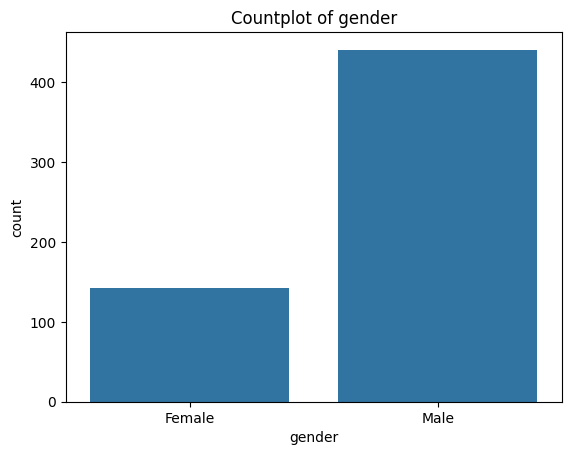

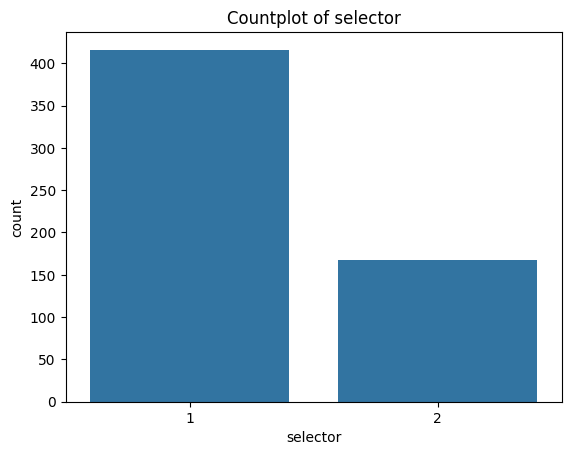

In [ ]:
# Visualisasikan fitur nominal / kategorikal misal (menggunakan countplot)
for col in cat_cols:
    countplot = sns.countplot(data=df, x=col)
    plt.title(f'Countplot of {col}')
    plt.show()

- Continous features

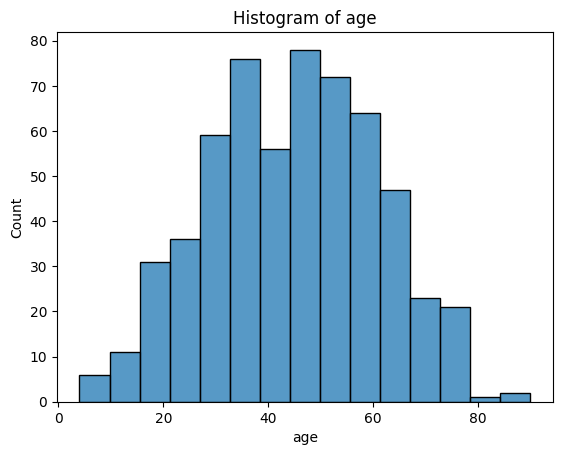

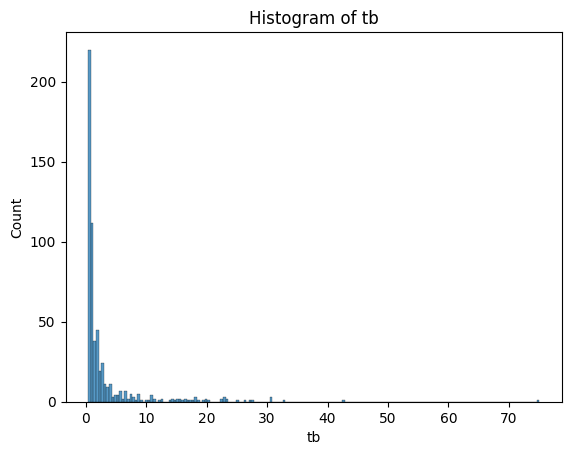

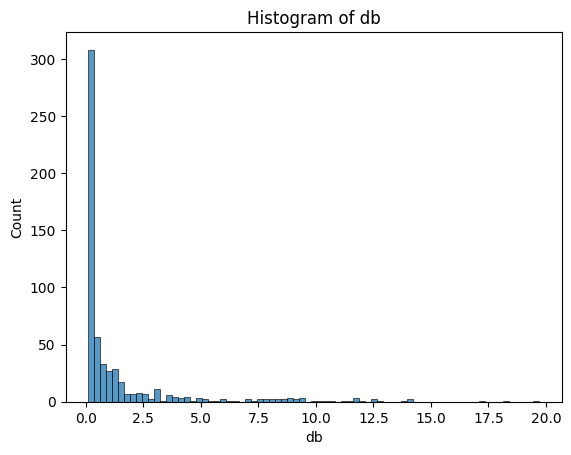

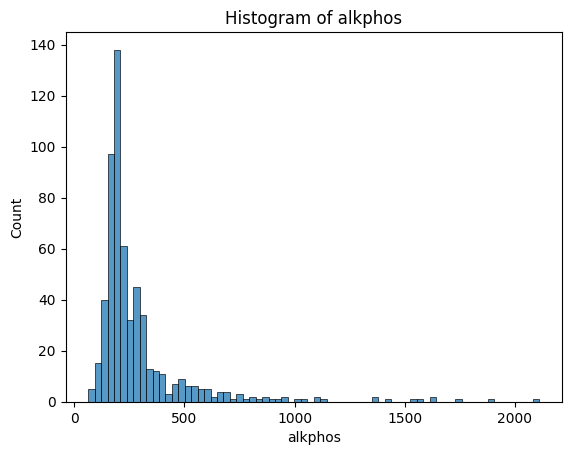

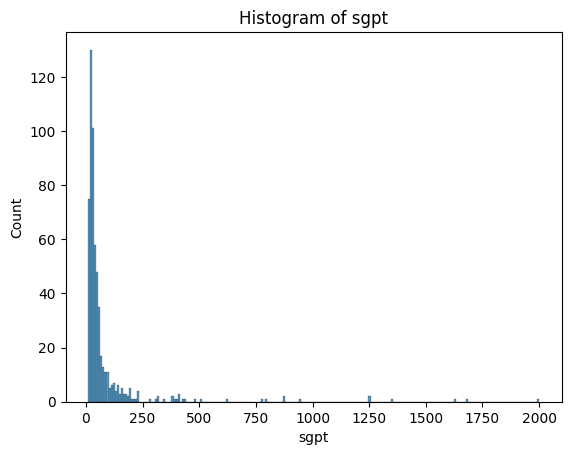

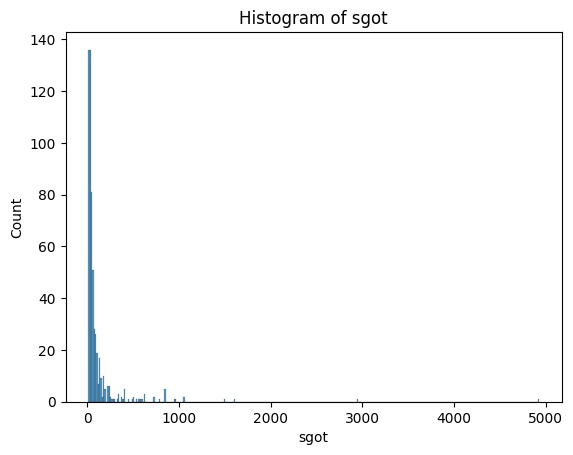

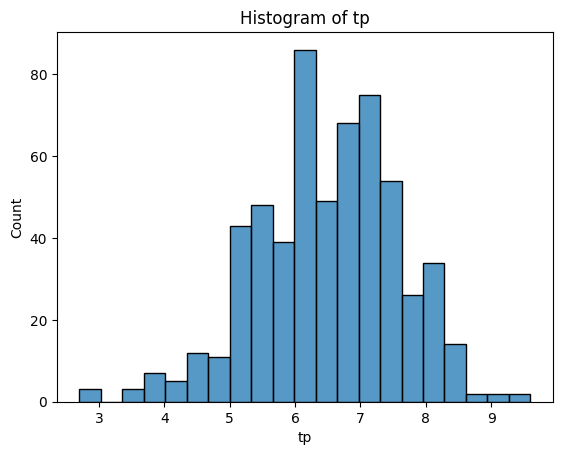

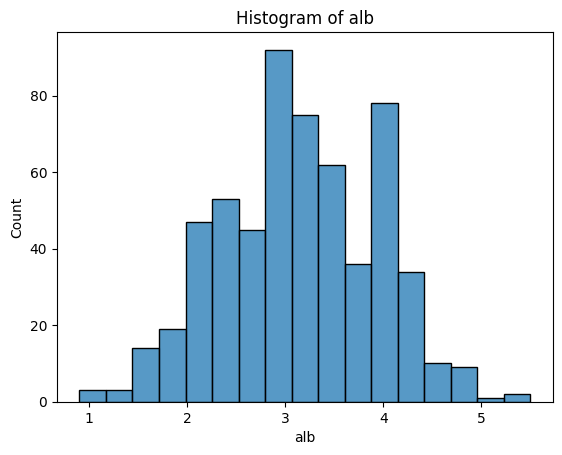

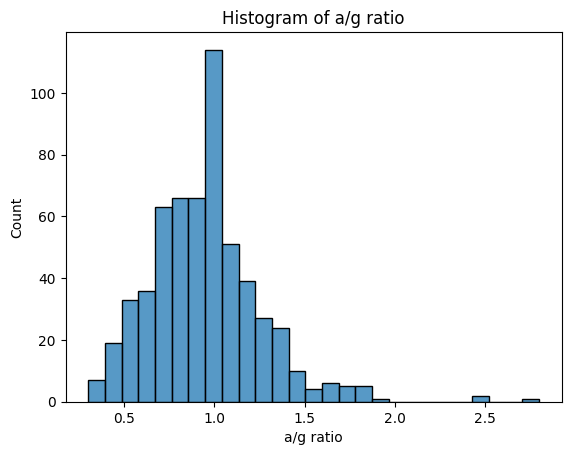

In [ ]:
# Visualisasikan fitur numerik continous (misal : histplot)
for col in num_cols:
    histplot = sns.histplot(data=df, x=col)
    plt.title(f'Histogram of {col}')
    plt.show()

## BAB 3 – (J.62DMI00.006.1) memvalidasi data

- Pada tahap ini, kita akan mengecek apakah terdapat data yang hilang atau tidak, terdapat duplikat atau tidak, dan apakah terdapat data yang tidak konsisten (bisa melakukan pengecekan nilai unik)

### Memeriksa nilai kosong (missing value)

In [ ]:
# Melihat Nilai null / missing value
df.isnull().sum()

,0
age,0
gender,0
tb,0
db,0
alkphos,0
sgpt,0
sgot,0
tp,0
alb,0
a/g ratio,4


### Memeriksa duplikat data

In [ ]:
# Melihat Data duplikat
df.duplicated().sum()

np.int64(13)

In [ ]:
print("Duplikat:", df.duplicated().sum())

Duplikat: 13


In [ ]:

# Melihat Data duplikat
df.duplicated().sum()
df[df.duplicated(keep=False)]

,age,gender,tb,db,alkphos,sgpt,sgot,tp,alb,a/g ratio,selector
18,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
54,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1


### Memeriksa nilai unique

In [ ]:
df.nunique()

,0
age,72
gender,2
tb,113
db,80
alkphos,263
sgpt,152
sgot,177
tp,58
alb,40
a/g ratio,69


In [ ]:
for col in df.columns:
 print(f'{col}')
 print(f'Jumlah nilai yang unik: {df[col].nunique()}')
 print(f'Nilai yang paling sering muncul (modus): {df[col].mode().values[0]}')
 print(f'{df[col].unique()}\n')

age
Jumlah nilai yang unik: 72
Nilai yang paling sering muncul (modus): 60
[65 62 58 72 46 26 29 17 55 57 64 74 61 25 38 33 40 51 63 34 20 84 52 30
 48 47 45 42 50 85 35 21 32 31 54 37 66 60 19 75 68 70 49 14 13 18 39 27
 36 24 28 53 15 56 44 41  7 22  8  6  4 43 23 12 69 16 78 11 73 67 10 90]

gender
Jumlah nilai yang unik: 2
Nilai yang paling sering muncul (modus): Male
['Female' 'Male']

tb
Jumlah nilai yang unik: 113
Nilai yang paling sering muncul (modus): 0.8
[ 0.7 10.9  7.3  1.   3.9  1.8  0.9  0.6  2.7  1.1  1.6  2.2  2.9  6.8
  1.9  4.1  6.2  4.   2.6  1.3 14.2  1.4  2.4 18.4  3.1  8.9  0.8  2.8
  2.   5.7  8.6  5.8  5.2  3.8  6.6  0.5  5.3  3.2  1.2 12.7 15.9 18.
 23.  22.7  1.7  3.  11.3  4.7  4.2  3.5  5.9  8.7 11.  11.5  4.5 75.
 22.8 14.1 14.8 10.6  8.   1.5  2.1  6.3  2.3 27.2  2.5  3.6 30.5 16.4
 14.5 18.5 23.2  3.7  3.3  7.1  6.7 22.6  7.5  5.   4.9  8.2  0.4  7.4
 23.3  7.9  3.4 19.8 32.6 17.7 20.  26.3  4.4  9.4 30.8 19.6 15.8  5.5
 20.2 27.7 11.1 10.2 42.8 15.2 16.6

In [ ]:
# melihat apakah ada data yang tidak konsisten
df['selector'].value_counts()

,count
selector,
1,416
2,167


## BAB 4 – (J.62DMI00.007.1) menentukan object data

**WAJIB DIISI**,

ADA BERAPA FITUR: `11 FITUR (1 CLASS TARGET)`

ADA BERAPA RECORDS: `582`

ADA BERAPA FITUR YANG TIDAK DIGUNAKAN: `0`

TARGETNYA APA: `SELECTOR`

ADA BERAPA MODEL DATAFRAME YANG HARUS DIBUAT?: `2 (GAN DAN SMOTE)`

In [ ]:
# Melihat kembali informasi dataset untuk memahami isi dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        583 non-null    int64  
 1   gender     583 non-null    object 
 2   tb         583 non-null    float64
 3   db         583 non-null    float64
 4   alkphos    583 non-null    int64  
 5   sgpt       583 non-null    int64  
 6   sgot       583 non-null    int64  
 7   tp         583 non-null    float64
 8   alb        583 non-null    float64
 9   a/g ratio  579 non-null    float64
 10  selector   583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


- Jika ada data yang tidak konsisten, silahkan di tangani pada proses dibawah ini.

In [ ]:
# jika terdapat data yang tidak konsisten

- Jika ada fitur yang tidak berguna, bisa dihapus pada cell dibawah ini

In [ ]:
# jika terdapar fitur yang tidak berguna

### Mengubah label target

In [ ]:
# Ubah label target menjadi 0 dan 1
df['selector'] = df['selector'].map({1: 0, 2: 1})

## BAB 5 – (J.62DMI00.008.1) membersihkan data
- **ANDA TIDAK PERLU MELAKUKAN OUTLIER REMOVAL** NAMUN HANDLE JIKA TERDAPAT DATA YANG KOSONG (TIDAK DIREKOMENDASIKAN MENGHAPUS), HANDLE JIKA ADA DUPLIKAT

### Memeriksa missing values

In [ ]:
# Memastikan kembali untuk melihat data kosong
df.isnull().sum()

,0
age,0
gender,0
tb,0
db,0
alkphos,0
sgpt,0
sgot,0
tp,0
alb,0
a/g ratio,4


### Handling missing values

Ada aturan tidak baku dalam data science:
*   jika missing value lebih dari 60% maka lebih baik dilakukan `drop feature`
*   Jika hanya terdapat sedikit missing values (kurang dari 5%) dan data tidak mengandung informasi penting maka lebih baik dilakukan `drop baris` agar tidak mengubah distribusi fitur lainnya
*  Jika data bersifat numerik, data tidak memiliki outlier yang ekstrem, jumlah missing values lebih dari 5%, jumlah missing values kurang dari 60% dan distribusi data mendekati normal maka lebih baik dilakukan `imputasi menggunakan mean`
*   Jika data bersifat numerik, data memiliki outlier yang tidak ekstrem, jumlah missing values lebih dari 5%, jumlah missing values kurang dari 60% dan berdistribusi tidak normal maka lebih baik dilakukan `imputasi median`
*   Jika data bersifat kategorikal, jumlah missing value kurang dari 60%, dan lebih dari 5% maka lebih baik dilakukan `imputasi modus`

In [ ]:
# Handling baris yang memiliki NaN di kolom 'a/g ratio'
df = df.dropna(subset=['a/g ratio'])

### Handling duplikat data

In [ ]:
# Cek duplikasi data & Handle jika terdapat duplikat data
df = df.drop_duplicates()

- Dari pekerjaan Membersihkan Data yang telah anda lakukan, Bagaimana yang akan anda lakukan jika Dataset anda ternyata memiliki beberapa nilai kosong (missing value)? `HANDLING MISSING VALUES TERSEBUT, BISA DROP BARIS, DROP KOLOM, IMPUTASI MEAN, IMPUTASI MEDIAN, DAN IMPUTASI MODUS TERGANTUNG SPESIFIKASI DARI DATANYA`

## BAB 6 – (J.62DMI00.009.1) mengkonstruksi data
CATATAN:
- **UNTUK UJIAN INI, ANDA TIDAK PERLU MELAKUKAN FEATURE ENGINEERING DISINI**
- NAMUN ANDA WAJIB MELAKUKAN SAMPLING UNTUK BALANCING CLASS (MENYEIMBANGKAN KELAS DENGAN SKEMA OVER SAMPLING), MENUNJUKKAN OUTLIER YANG TERDAPAT PADA DATASETS, DAN MENAMPILKAN HEATMAP KORELASI ANTAR FITUR UNTUK MENGETAHUI FITUR - FITUR YANG MEMILIKI KORELASI TINGGI DAN RENDAH PADA DATASETS

### Deteksi Outlier

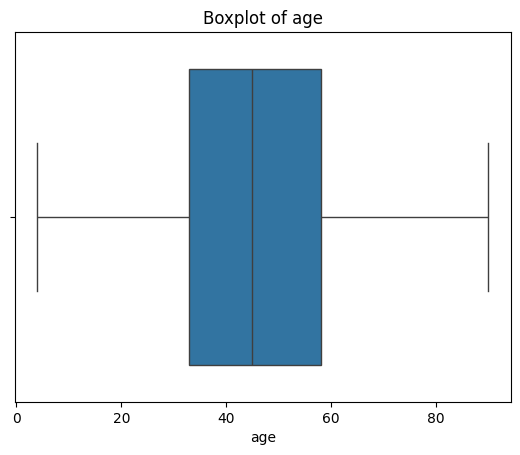

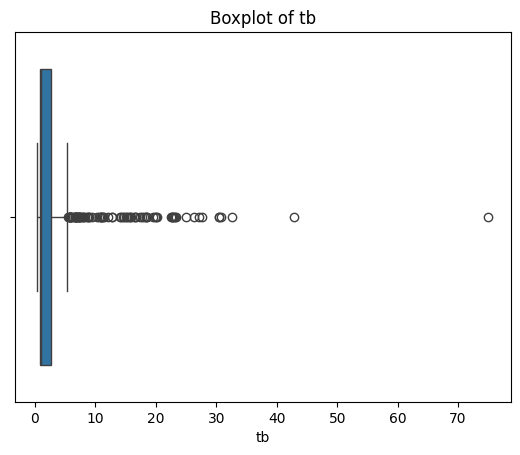

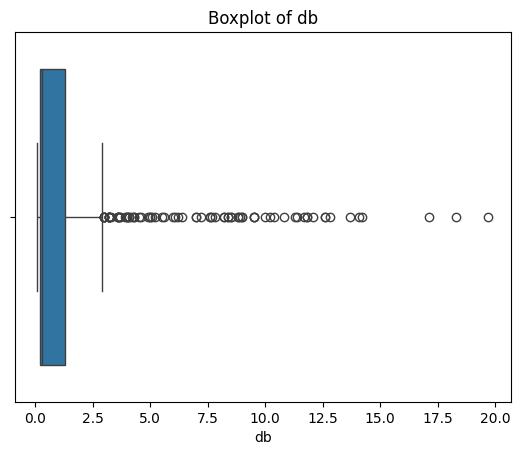

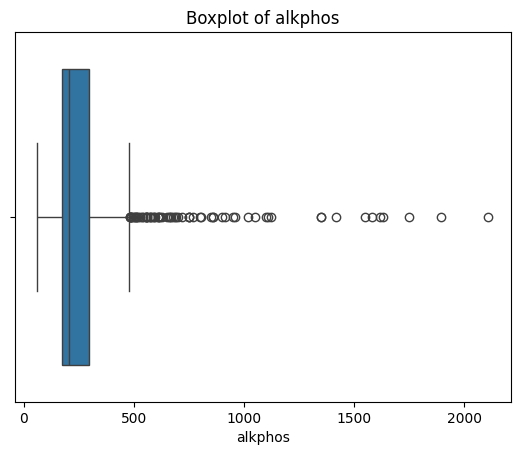

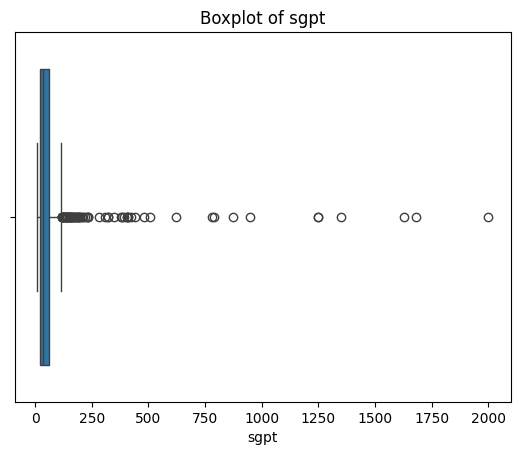

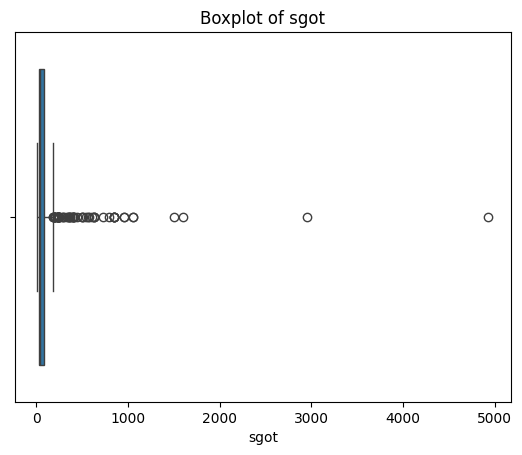

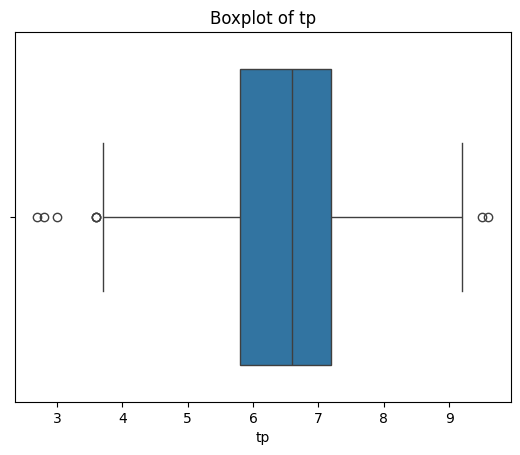

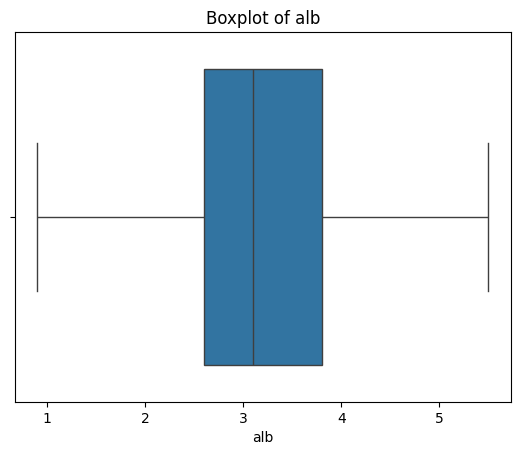

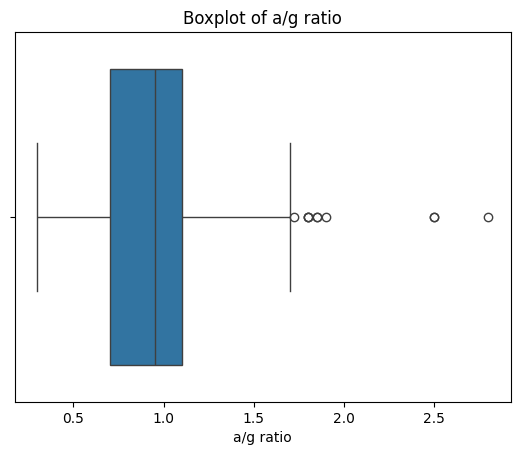

In [ ]:
# cek outlier dengan visualisasi
for col in num_cols:
    boxplot = sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

#### Handling dengan IQR

Ingat, handling dengan IQR disini jika distribusi data tidak normal (tidak simetris atau skewed), dimana ada data yang outliersnya positively skewed (miring kanan/condong di kanan) atau negatively skewed (miring kiri/condong di kiri)



In [ ]:
# Buat salinan dataframe
data_cleaned = df.copy()

In [ ]:
iqr_cols = ['tb', 'db', 'alkphos', 'sgpt', 'sgot',
       'a/g ratio']

for col in iqr_cols:
    Q1 = data_cleaned[col].quantile(0.25)
    Q3 = data_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data_cleaned[col] = data_cleaned[col].apply(
        lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
    )
    print(f"Kolom {col} telah diatasi outliersnya dengan IQR.")

Kolom tb telah diatasi outliersnya dengan IQR.
Kolom db telah diatasi outliersnya dengan IQR.
Kolom alkphos telah diatasi outliersnya dengan IQR.
Kolom sgpt telah diatasi outliersnya dengan IQR.
Kolom sgot telah diatasi outliersnya dengan IQR.
Kolom a/g ratio telah diatasi outliersnya dengan IQR.


#### Handling dengan Zscore

Ingat, handling dengan Zscore disini jika data yang berdistribusi normal atau mendekati normal (simetris) atau seimbang outliersnya antara kanan dan kiri.


In [ ]:
zscore_cols = ['tp']

for col in zscore_cols:
    mean = data_cleaned[col].mean()
    std = data_cleaned[col].std()
    threshold = 3  # z-score threshold

    data_cleaned[col] = data_cleaned[col].apply(
        lambda x: mean - threshold * std if (x - mean)/std < -threshold
        else (mean + threshold * std if (x - mean)/std > threshold else x)
    )
    print(f"Kolom {col} telah diatasi outliersnya dengan Z-score.")

Kolom tp telah diatasi outliersnya dengan Z-score.


In [ ]:
df = data_cleaned

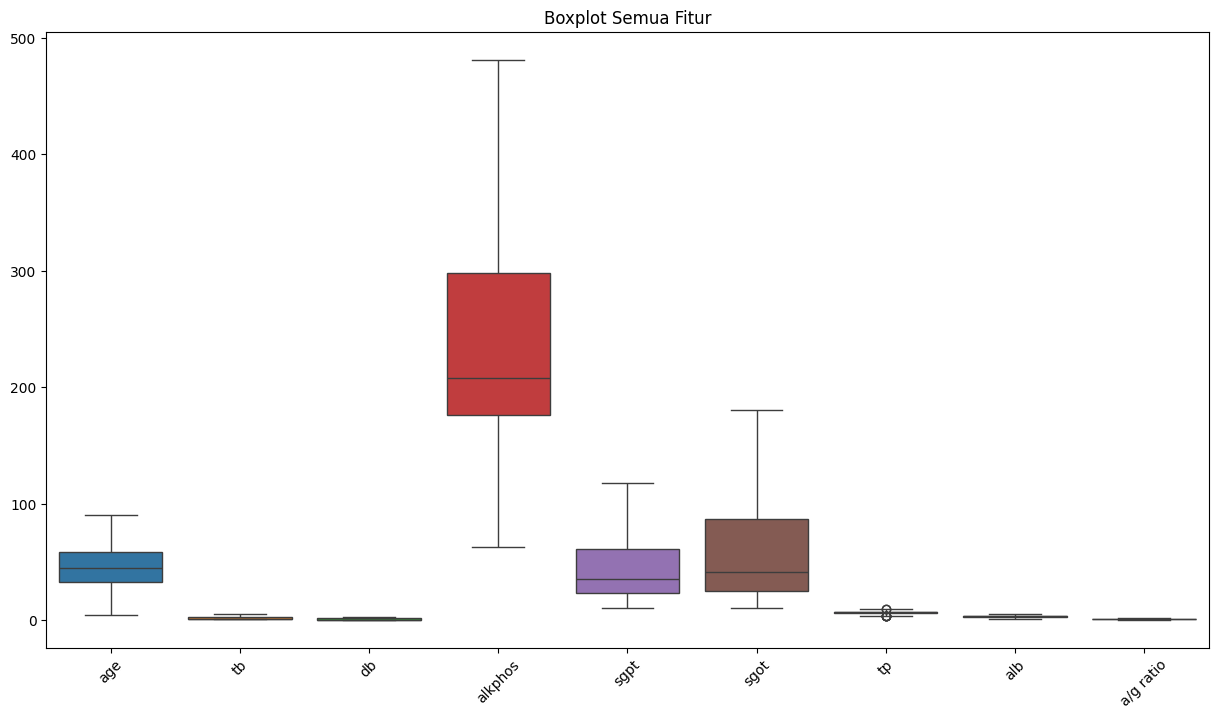

In [ ]:
# cek outlier dengan visualisasi (misalnya menggunakan boxplot)
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.drop('selector', axis=1))
plt.xticks(rotation=45)
plt.title("Boxplot Semua Fitur")
plt.show()

### Mengubah kolom ke numerik

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
enc_cols = ['gender']

In [ ]:
for col in enc_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

### Heatmap Correlation

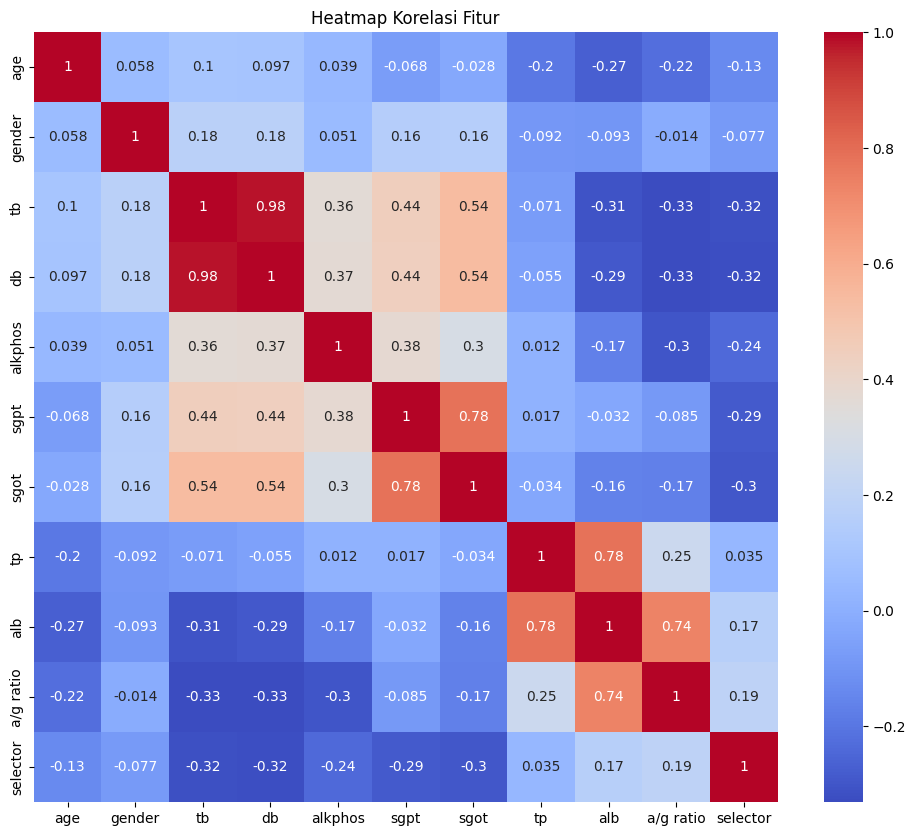

In [ ]:
# melihat korelasi antar fitur (heatmap)
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Fitur")
plt.show()

- PADA TAHAP SELANJUTNYA, SILAHKAN BANDINGKAN HASIL PEMODELAN KETIKA MENGGUNAKAN DATA YANG TELAH DIAUGMENTASI MENGGUNAKAN GAN DENGAN DATA YANG DIAUGMENTASI MENGGUNAKAN SMOTE.

- SETELAH ITU, JAWAB PERTANYAAN BERIKUT:
  - DARI RATA-RATA SEMUA MODEL YANG DIBANDINGKAN (RF, KNN, DAN LOGISTIC REGRESSION), AKURASI YANG DIDAPATKAN LEBIH TINGGI MENGGUNAKAN AUGMENTASI GAN ATAU SMOTE? : `GAN`

## BAB 7 – (J.62DMI00.010.1) menentukan label data

- Gunakan 3 nama variabel yang berbeda untuk proses splitting dataset berdasarkan metode augmentasi yang digunakan, yaitu untuk SMOTE dan GAN:

*   Untuk dataset hasil augmentasi SMOTE:
1. `X_smote` = Untuk menampung dataset yang telah diaugmentasi menggunakan SMOTE.
2. `y_smote` = Untuk menampung target / kelas yang akan diprediksi dari dataset SMOTE.
3. `X_train_smote, X_test_smote, y_train_smote, y_test_smote` = Untuk menampung data hasil train_test_split menggunakan `X_smote` dan `y_smote`.

*  Untuk dataset hasil augmentasi GAN:
1. `X_gan` = Untuk menampung dataset yang telah diaugmentasi menggunakan GAN.
2. `y_gan` = Untuk menampung target / kelas yang akan diprediksi dari dataset GAN.
3. `X_train_gan, X_test_gan, y_train_gan, y_test_gan` = Untuk menampung data hasil train_test_split menggunakan `X_gan` dan `y_gan`.

- yang menjadi target adalah: `selector`
- yang menjadi fitur adalah : `'age', 'gender', 'tb', 'db', 'alkphos', 'sgpt', 'sgot', 'tp', 'alb', 'a/g ratio'`

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 566 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        566 non-null    int64  
 1   gender     566 non-null    int64  
 2   tb         566 non-null    float64
 3   db         566 non-null    float64
 4   alkphos    566 non-null    float64
 5   sgpt       566 non-null    float64
 6   sgot       566 non-null    float64
 7   tp         566 non-null    float64
 8   alb        566 non-null    float64
 9   a/g ratio  566 non-null    float64
 10  selector   566 non-null    int64  
dtypes: float64(8), int64(3)
memory usage: 53.1 KB


### Splitting

#### Splitting untuk GAN

In [ ]:
X_gan = df.drop('selector', axis=1)
y_gan = df['selector']

In [ ]:
# Splitting data untuk GAN
X_train_gan, X_test_gan, y_train_gan, y_test_gan = train_test_split(X_gan, y_gan, stratify=y_gan, test_size=0.2, random_state=42)

#### Splitting untuk SMOTE

In [ ]:
X_smote = df.drop('selector', axis=1)
y_smote = df['selector']

In [ ]:
# Splitting data untuk SMOTE
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, stratify=y_smote, test_size=0.2, random_state=42)

### Balancing data Imbalance

Distribusi kelas di train (original):
selector
0    323
1    129
Name: count, dtype: int64


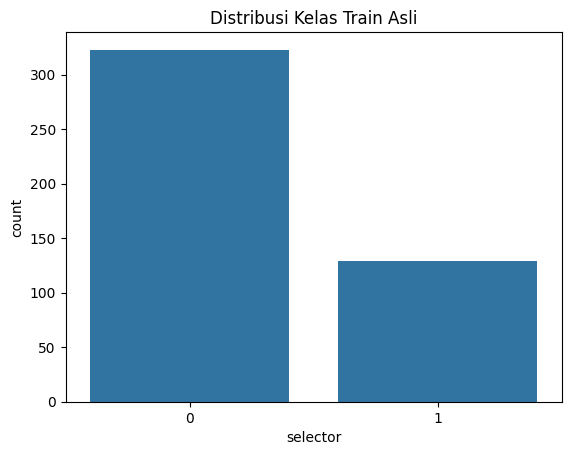

In [ ]:
print("Distribusi kelas di train (original):")
print(y_train_smote.value_counts())
sns.countplot(x=y_train_smote)
plt.title("Distribusi Kelas Train Asli")
plt.show()

#### SMOTE

In [ ]:
# karena jumlah kelas target tidak seimbang, kita akan melakukan resampling
smote = SMOTE(random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(X_train_smote, y_train_smote)

Distribusi kelas setelah SMOTE:
selector
1    323
0    323
Name: count, dtype: int64


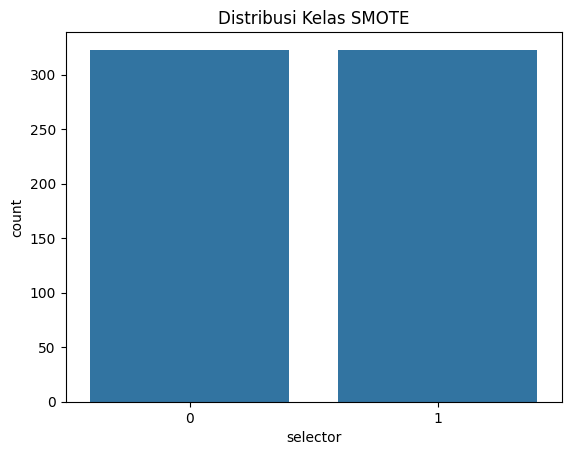

In [ ]:
# Tampilkan visualisasi persebaran kelas setelah melalui proses sampling
print("Distribusi kelas setelah SMOTE:")
print(pd.Series(y_smote_resampled).value_counts())
sns.countplot(x=y_smote_resampled)
plt.title("Distribusi Kelas SMOTE")
plt.show()

#### GAN

In [ ]:
# Ubah ke DataFrame agar cocok dengan CTGAN
X_train_gan_scaled_df = pd.DataFrame(X_train_gan, columns=X_train_gan.columns)
X_train_gan_scaled_df['selector'] = y_train_gan.values

# Ambil data minoritas untuk dilatih di CTGAN
minority_class = y_train_gan.value_counts().idxmin()
minority_data = X_train_gan_scaled_df[X_train_gan_scaled_df['selector'] == minority_class]

# Latih CTGAN
ctgan = CTGAN()
ctgan.fit(minority_data)

# Tentukan berapa data sintetis yang ingin dihasilkan
minority_count = y_train_gan.value_counts().min()
majority_count = y_train_gan.value_counts().max()
n_samples_to_generate = majority_count - minority_count

# Hasilkan data sintetis dari kelas minoritas
synthetic_data = ctgan.sample(n_samples_to_generate)

# Gabungkan kembali data sintetis dengan data asli
augmented_train_data = pd.concat([X_train_gan_scaled_df, synthetic_data], ignore_index=True)

# Pisahkan kembali fitur dan target setelah augmentasi
X_gan_resampled = augmented_train_data.drop(columns='selector')
y_gan_resampled = augmented_train_data['selector']

/usr/local/lib/python3.11/dist-packages/torch/autograd/graph.py:823: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at /pytorch/aten/src/ATen/cuda/CublasHandlePool.cpp:180.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Distribusi kelas setelah GAN:
selector
1    323
0    323
Name: count, dtype: int64


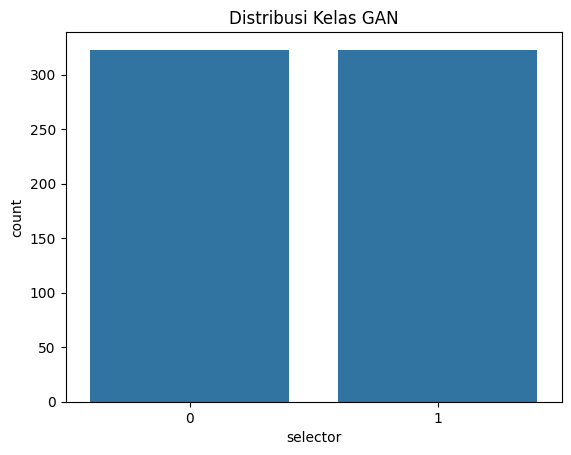

In [ ]:
# Tampilkan visualisasi persebaran kelas setelah melalui proses sampling
print("Distribusi kelas setelah GAN:")
print(pd.Series(y_gan_resampled).value_counts())
sns.countplot(x=y_gan_resampled)
plt.title("Distribusi Kelas GAN")
plt.show()

### Normalisasi

- ANDA PERLU MELAKUKAN NORMALISASI DISINI

In [ ]:
# proses normalisasi / scalling
scaler_smote = RobustScaler()
X_train_smote_scaled = scaler_smote.fit_transform(X_smote_resampled)
X_test_smote_scaled = scaler_smote.transform(X_test_smote)

scaler_gan = RobustScaler()
X_train_gan_scaled = scaler_gan.fit_transform(X_gan_resampled)
X_test_gan_scaled = scaler_gan.transform(X_test_gan)

- Dari pekerjaan Mengkonstruksi Data yang telah anda lakukan, bagaimana cara Anda menentukan fitur-fitur pada dataset anda perlu dinormalisasi atau tidak? : `memeriksa tipe data untuk memastikan fitur bersifat numerik, mengevaluasi rentang nilai setiap fitur untuk melihat apakah terdapat perbedaan skala yang signifikan, melihat visualisasi distribusi seperti histogram atau boxplot untuk mengidentifikasi penyebaran data dan keberadaan outlier yang dapat memengaruhi performa model`

## BAB 8 – (J.62DMI00.013.1) membangun model
- BANGUN MODEL DENGAN MENGGUNAKAN ALGORITMA KLASIFIKASI SEPERTI RANDOM FOREST (RF), K-NEAREST NEIGHBOUR (KNN), DAN LOGISTIC REGRESSION (LR) UNTUK KEDUA DATASET (MEMAKAI AUGMENTASI GAN & MEMAKAI AUGMENTASI SMOTE)

In [ ]:
def eval_model(model, X_train_data, y_train_data, X_test_data, y_test_data, model_name):
    model.fit(X_train_data, y_train_data)
    y_pred = model.predict(X_test_data)
    print(f"=== {model_name} ===")
    print(classification_report(y_test_data, y_pred))
    sns.heatmap(confusion_matrix(y_test_data, y_pred), annot=True, fmt='d', cmap='viridis')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

### SVM

SVM dengan SMOTE
=== SVM - SMOTE ===
              precision    recall  f1-score   support

           0       0.97      0.48      0.64        81
           1       0.43      0.97      0.60        33

    accuracy                           0.62       114
   macro avg       0.70      0.73      0.62       114
weighted avg       0.82      0.62      0.63       114



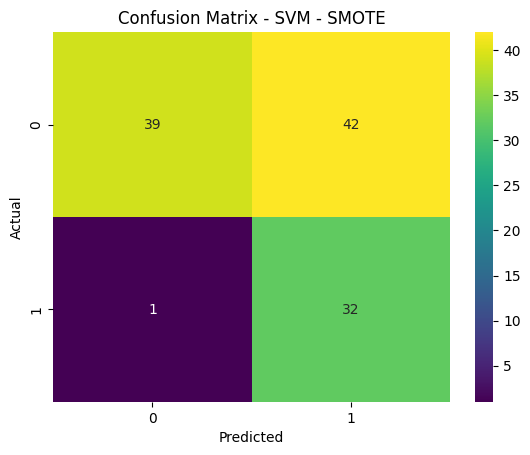

In [ ]:
svm = SVC(probability=True, random_state=42)

print("SVM dengan SMOTE")
eval_model(svm, X_train_smote_scaled, y_smote_resampled, X_test_smote_scaled, y_test_smote, "SVM - SMOTE")

SVM dengan GAN
=== SVM - GAN ===
              precision    recall  f1-score   support

           0       0.81      0.74      0.77        81
           1       0.47      0.58      0.52        33

    accuracy                           0.69       114
   macro avg       0.64      0.66      0.65       114
weighted avg       0.71      0.69      0.70       114



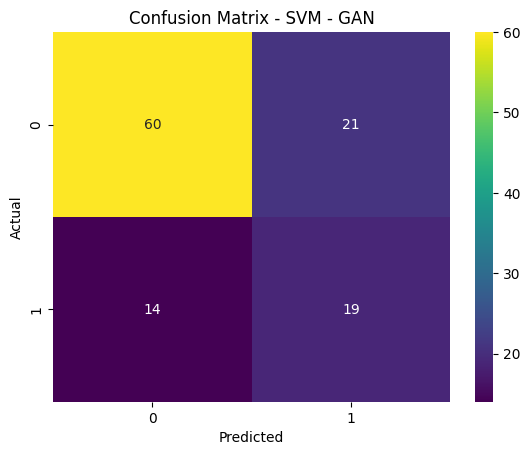

In [ ]:
print("SVM dengan GAN")
eval_model(svm, X_train_gan_scaled, y_gan_resampled, X_test_gan_scaled, y_test_gan, "SVM - GAN")

### Decision Tree

Decision Tree dengan SMOTE
=== Decision Tree - SMOTE ===
              precision    recall  f1-score   support

           0       0.81      0.74      0.77        81
           1       0.47      0.58      0.52        33

    accuracy                           0.69       114
   macro avg       0.64      0.66      0.65       114
weighted avg       0.71      0.69      0.70       114



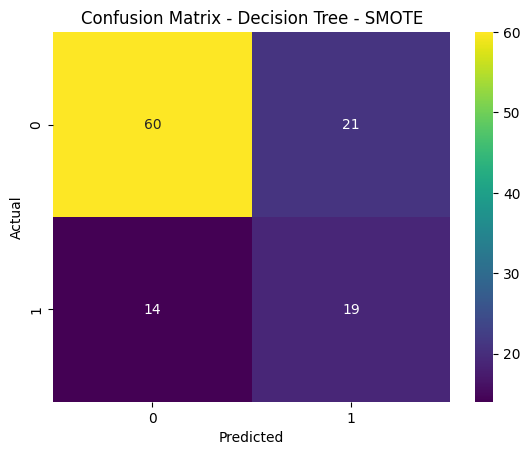

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

print("Decision Tree dengan SMOTE")
eval_model(dt, X_train_smote_scaled, y_smote_resampled, X_test_smote_scaled, y_test_smote, "Decision Tree - SMOTE")


Decision Tree dengan GAN
=== Decision Tree - GAN ===
              precision    recall  f1-score   support

           0       0.79      0.67      0.72        81
           1       0.41      0.58      0.48        33

    accuracy                           0.64       114
   macro avg       0.60      0.62      0.60       114
weighted avg       0.68      0.64      0.65       114



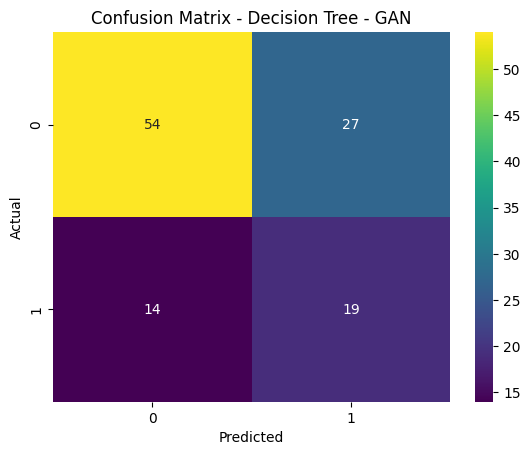

In [ ]:
print("Decision Tree dengan GAN")
eval_model(dt, X_train_gan_scaled, y_gan_resampled, X_test_gan_scaled, y_test_gan, "Decision Tree - GAN")

### KNN

KNN dengan SMOTE
=== KNN - SMOTE ===
              precision    recall  f1-score   support

           0       0.82      0.56      0.66        81
           1       0.39      0.70      0.50        33

    accuracy                           0.60       114
   macro avg       0.60      0.63      0.58       114
weighted avg       0.69      0.60      0.61       114



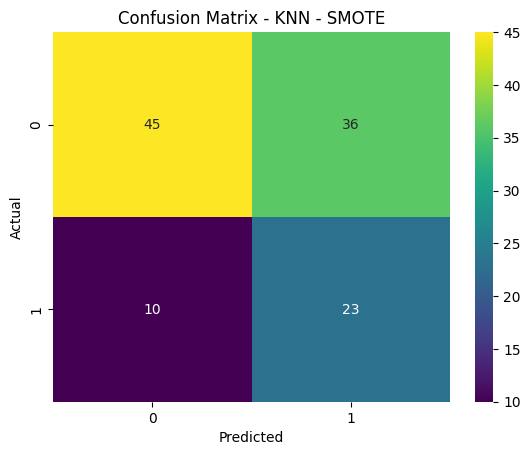

In [ ]:
knn = KNeighborsClassifier()

print("KNN dengan SMOTE")
eval_model(knn, X_train_smote_scaled, y_smote_resampled, X_test_smote_scaled, y_test_smote, "KNN - SMOTE")


KNN dengan GAN
=== KNN - GAN ===
              precision    recall  f1-score   support

           0       0.73      0.74      0.74        81
           1       0.34      0.33      0.34        33

    accuracy                           0.62       114
   macro avg       0.54      0.54      0.54       114
weighted avg       0.62      0.62      0.62       114



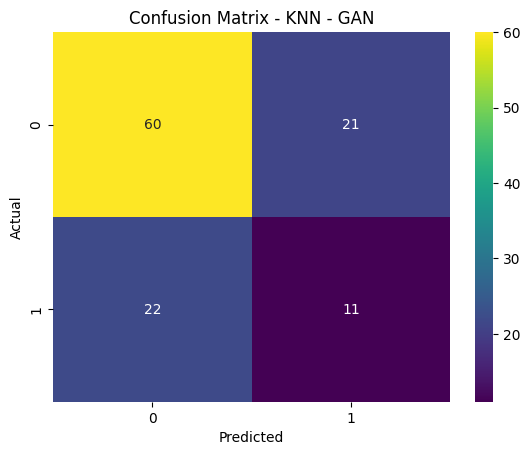

In [ ]:
print("KNN dengan GAN")
eval_model(knn, X_train_gan_scaled, y_gan_resampled, X_test_gan_scaled, y_test_gan, "KNN - GAN")

- Dari pekerjaan Membangun Model yang telah anda lakukan, bagaimana cara Anda meningkatkan hasil akurasi pada sebuah model? : `OPTIMASI DENGAN HYPERPARAMETER TUNING ATAU FEATURE SELECTION`

### Logistic Regression

Logistic Regression dengan SMOTE
=== Logistic Regression - SMOTE ===
              precision    recall  f1-score   support

           0       0.94      0.54      0.69        81
           1       0.45      0.91      0.60        33

    accuracy                           0.65       114
   macro avg       0.69      0.73      0.64       114
weighted avg       0.79      0.65      0.66       114



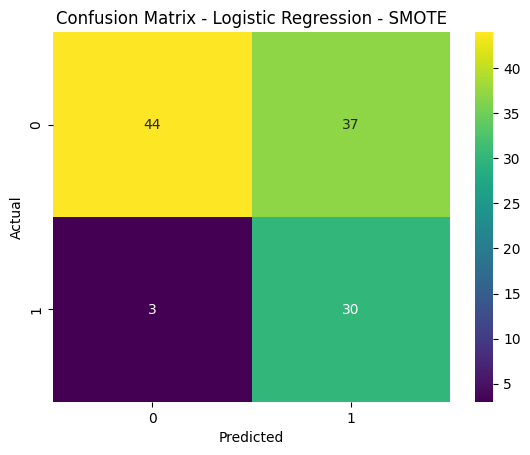

In [ ]:
logreg = LogisticRegression(max_iter=1000, random_state=42)

print("Logistic Regression dengan SMOTE")
eval_model(logreg, X_train_smote_scaled, y_smote_resampled, X_test_smote_scaled, y_test_smote, "Logistic Regression - SMOTE")


Logistic Regression dengan GAN
=== Logistic Regression - GAN ===
              precision    recall  f1-score   support

           0       0.86      0.70      0.78        81
           1       0.50      0.73      0.59        33

    accuracy                           0.71       114
   macro avg       0.68      0.72      0.68       114
weighted avg       0.76      0.71      0.72       114



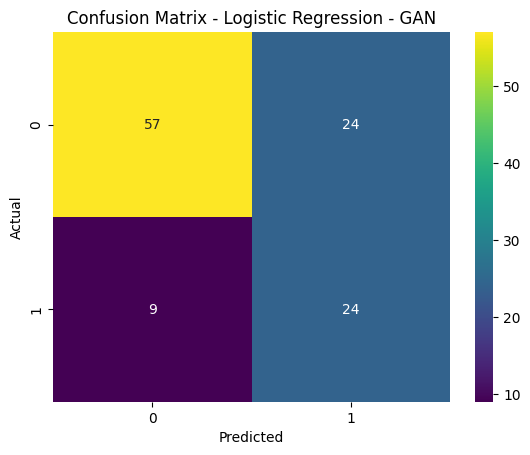

In [ ]:
print("Logistic Regression dengan GAN")
eval_model(logreg, X_train_gan_scaled, y_gan_resampled, X_test_gan_scaled, y_test_gan, "Logistic Regression - GAN")

## BAB 9 – (J.62DMI00.014.1) mengevaluasi hasil pemodelan
- BANDINGKAN SEMUA MODEL UNTUK MENGETAHUI MODEL MANA YANG MEMILIKI AKURASI YANG TINGGI

In [ ]:
# Inisialisasi model dasar
svm = SVC(probability=True, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
logreg = LogisticRegression(max_iter=1000, random_state=42)

# SMOTE
svm.fit(X_train_smote_scaled, y_smote_resampled)
svm_smote_acc = accuracy_score(y_test_smote, svm.predict(X_test_smote_scaled))

dt.fit(X_train_smote_scaled, y_smote_resampled)
dt_smote_acc = accuracy_score(y_test_smote, dt.predict(X_test_smote_scaled))

knn.fit(X_train_smote_scaled, y_smote_resampled)
knn_smote_acc = accuracy_score(y_test_smote, knn.predict(X_test_smote_scaled))

logreg.fit(X_train_smote_scaled, y_smote_resampled)
logreg_smote_acc = accuracy_score(y_test_smote, logreg.predict(X_test_smote_scaled))

# GAN
svm.fit(X_train_gan_scaled, y_gan_resampled)
svm_gan_acc = accuracy_score(y_test_gan, svm.predict(X_test_gan_scaled))

dt.fit(X_train_gan_scaled, y_gan_resampled)
dt_gan_acc = accuracy_score(y_test_gan, dt.predict(X_test_gan_scaled))

knn.fit(X_train_gan_scaled, y_gan_resampled)
knn_gan_acc = accuracy_score(y_test_gan, knn.predict(X_test_gan_scaled))

logreg.fit(X_train_gan_scaled, y_gan_resampled)
logreg_gan_acc = accuracy_score(y_test_gan, logreg.predict(X_test_gan_scaled))


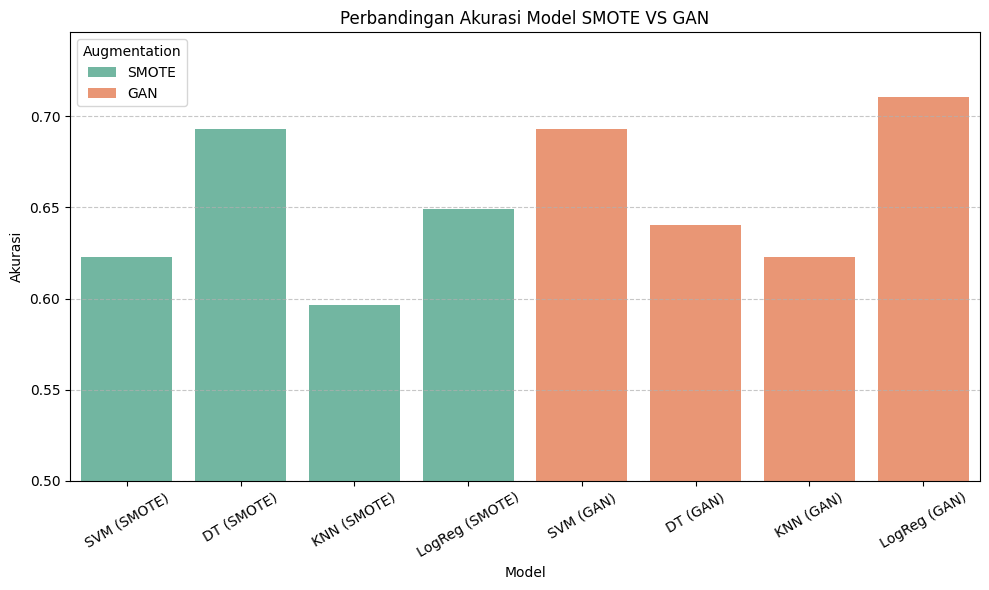

In [ ]:
# Nama model
model_names = [
    'SVM (SMOTE)', 'DT (SMOTE)', 'KNN (SMOTE)', 'LogReg (SMOTE)',
    'SVM (GAN)', 'DT (GAN)', 'KNN (GAN)', 'LogReg (GAN)'
]

# Akurasi dari semua model
accuracies = [
    svm_smote_acc, dt_smote_acc, knn_smote_acc, logreg_smote_acc,
    svm_gan_acc, dt_gan_acc, knn_gan_acc, logreg_gan_acc
]

# Buat DataFrame untuk plotting
df_result = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Augmentation': ['SMOTE'] * 4 + ['GAN'] * 4
})

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', hue='Augmentation', data=df_result, palette='Set2')
plt.title("Perbandingan Akurasi Model SMOTE VS GAN")
plt.ylabel("Akurasi")
plt.xlabel("Model")
plt.ylim(0.5)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- 3 MODEL YANG MEMILIKI AKURASI TERTINGGI? : `DT SMOTE, SVM GAN, DAN LOGISTIC REGRESSION GAN`
- Dari pekerjaan Mengevaluasi Hasil Pemodelan yang telah anda lakukan, bagaimana cara Anda menentukan model yang lebih akurat dan terbaik dari beberapa model yang telah anda bangun? : `dengan melihat metrik evaluasi pada classification report atau dengan melihat confusion matrix`

## BAB 10 - Optimasi model klasifikasi


Pada bab ini, proses optimasi difokuskan pada model yang memiliki akurasi tertinggi berdasarkan hasil perbandingan antara dua metode augmentasi data, yaitu SMOTE dan GAN. Model dengan performa terbaik—baik dari segi akurasi maupun metrik evaluasi lainnya dipilih untuk dilakukan proses tuning lebih lanjut guna memperoleh hasil klasifikasi yang lebih optimal.
Model apa yang memiliki akurasi tertinggi dari hasil perbandingan dua metode augmentasi? `MODEL-MODEL DARI AUGMENTASI GAN`



### SVM

In [ ]:
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}


In [ ]:

svm_random = GridSearchCV(SVC(probability=True, random_state=42),
                                svm_params,
                                cv=2, scoring='accuracy',
                                n_jobs=-1,
                                verbose=1)
svm_random.fit(X_train_gan_scaled, y_gan_resampled)
best_svm = svm_random.best_estimator_
y_svm_pred = svm_random.predict(X_test_gan_scaled)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


Optimized SVM - Best Parameters: {'C': 1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.81      0.74      0.77        81
           1       0.47      0.58      0.52        33

    accuracy                           0.69       114
   macro avg       0.64      0.66      0.65       114
weighted avg       0.71      0.69      0.70       114



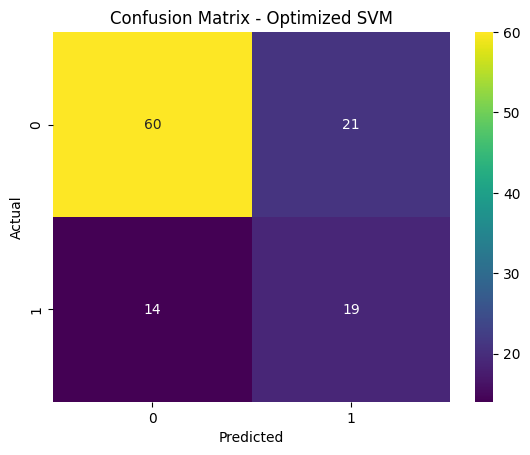

In [ ]:
print("Optimized SVM - Best Parameters:", svm_random.best_params_)
print(classification_report(y_test_gan, y_svm_pred))

sns.heatmap(confusion_matrix(y_test_gan, y_svm_pred), annot=True, fmt='d', cmap='viridis')
plt.title("Confusion Matrix - Optimized SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Decision Tree

In [ ]:
dt_params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [ ]:
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                       dt_params,
                       cv=5,
                       scoring='accuracy',
                       n_jobs=-1,
                       verbose=1)
dt_grid.fit(X_train_gan_scaled, y_gan_resampled)

best_dt = dt_grid.best_estimator_
y_dt_pred = best_dt.predict(X_test_gan_scaled)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


Optimized Decision Tree - Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.76      0.74      0.75        81
           1       0.40      0.42      0.41        33

    accuracy                           0.65       114
   macro avg       0.58      0.58      0.58       114
weighted avg       0.66      0.65      0.65       114



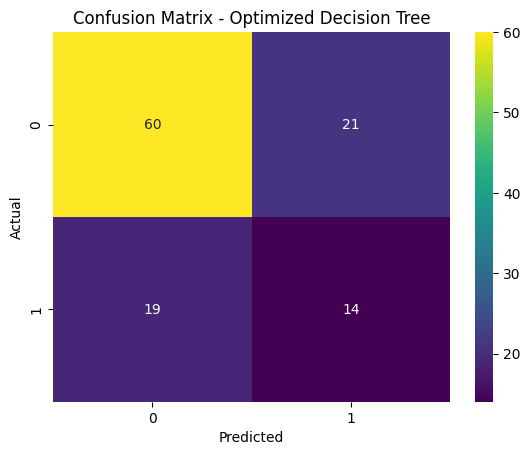

In [ ]:
print("Optimized Decision Tree - Best Parameters:", dt_grid.best_params_)
print(classification_report(y_test_gan, y_dt_pred))

sns.heatmap(confusion_matrix(y_test_gan, y_dt_pred), annot=True, fmt='d', cmap='viridis')
plt.title("Confusion Matrix - Optimized Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### KNN

In [ ]:
knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [ ]:
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid.fit(X_train_gan_scaled, y_gan_resampled)

best_knn = knn_grid.best_estimator_
y_knn_pred = best_knn.predict(X_test_gan_scaled)

Optimized KNN - Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.73      0.75      0.74        81
           1       0.35      0.33      0.34        33

    accuracy                           0.63       114
   macro avg       0.54      0.54      0.54       114
weighted avg       0.62      0.63      0.63       114



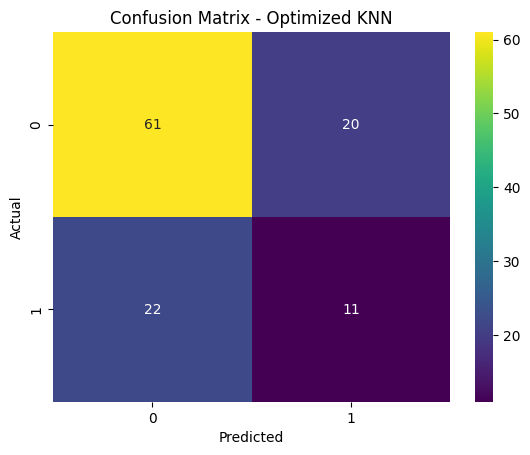

In [ ]:
print("Optimized KNN - Best Parameters:", knn_grid.best_params_)
print(classification_report(y_test_gan, y_knn_pred))

sns.heatmap(confusion_matrix(y_test_gan, y_knn_pred), annot=True, fmt='d', cmap='viridis')
plt.title("Confusion Matrix - Optimized KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Logistic Regression

In [ ]:
lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
}


In [ ]:
lr_grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), lr_params, cv=5, scoring='accuracy', n_jobs=-1)
lr_grid.fit(X_train_gan_scaled, y_gan_resampled)
best_lr = lr_grid.best_estimator_
y_lr_pred = best_lr.predict(X_test_gan_scaled)

Optimized Logistic Regression - Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.85      0.70      0.77        81
           1       0.49      0.70      0.57        33

    accuracy                           0.70       114
   macro avg       0.67      0.70      0.67       114
weighted avg       0.75      0.70      0.71       114



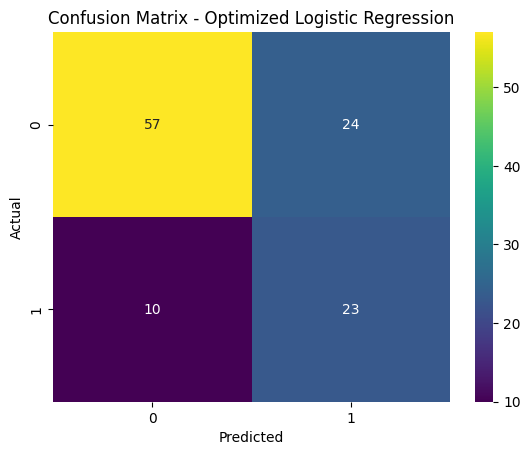

In [ ]:
print("Optimized Logistic Regression - Best Parameters:", lr_grid.best_params_)
print(classification_report(y_test_gan, y_lr_pred))

sns.heatmap(confusion_matrix(y_test_gan, y_lr_pred), annot=True, fmt='d', cmap='viridis')
plt.title("Confusion Matrix - Optimized Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Model Comparison

In [ ]:
# Akurasi SEBELUM Optimasi
svm_base = SVC(probability=True, random_state=42)
dt_base = DecisionTreeClassifier(random_state=42)
knn_base = KNeighborsClassifier()
logreg_base = LogisticRegression(max_iter=1000, random_state=42)

svm_base.fit(X_train_gan_scaled, y_gan_resampled)
svm_before_acc = accuracy_score(y_test_gan, svm_base.predict(X_test_gan_scaled))

dt_base.fit(X_train_gan_scaled, y_gan_resampled)
dt_before_acc = accuracy_score(y_test_gan, dt_base.predict(X_test_gan_scaled))

knn_base.fit(X_train_gan_scaled, y_gan_resampled)
knn_before_acc = accuracy_score(y_test_gan, knn_base.predict(X_test_gan_scaled))

logreg_base.fit(X_train_gan_scaled, y_gan_resampled)
logreg_before_acc = accuracy_score(y_test_gan, logreg_base.predict(X_test_gan_scaled))

# Akurasi SESUDAH Optimasi GAN
svm_after_acc = accuracy_score(y_test_gan, best_svm.predict(X_test_gan_scaled))
dt_after_acc = accuracy_score(y_test_gan, best_dt.predict(X_test_gan_scaled))
knn_after_acc = accuracy_score(y_test_gan, best_knn.predict(X_test_gan_scaled))
logreg_after_acc = accuracy_score(y_test_gan, best_lr.predict(X_test_gan_scaled))


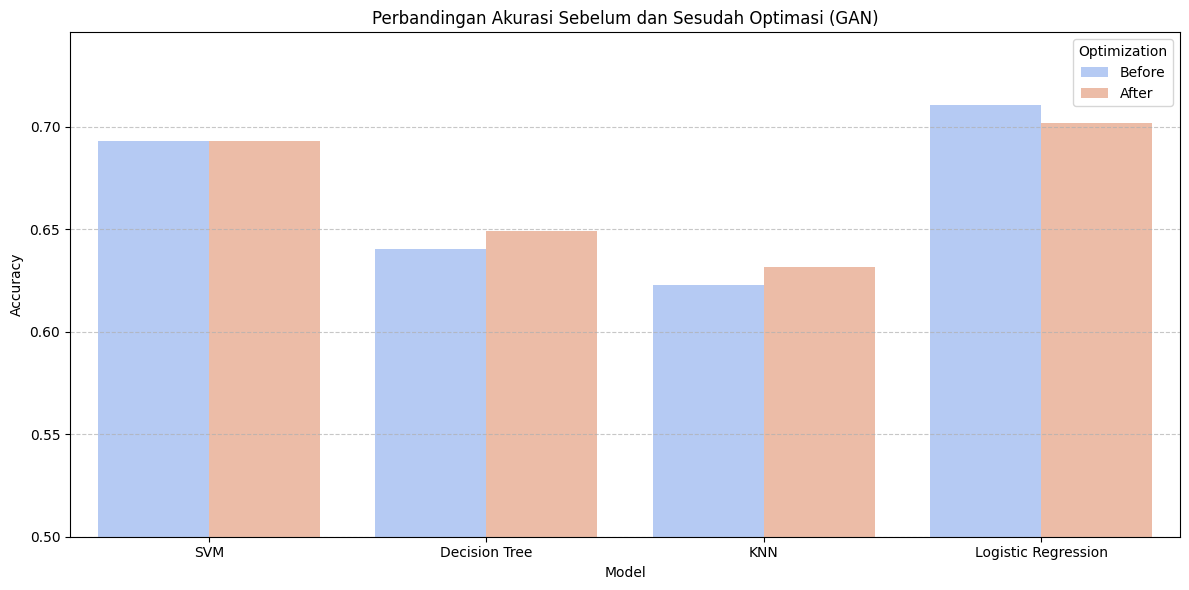

In [ ]:
compare_df = pd.DataFrame({
    'Model': ['SVM', 'Decision Tree', 'KNN', 'Logistic Regression'] * 2,
    'Accuracy': [svm_before_acc, dt_before_acc, knn_before_acc, logreg_before_acc,
                 svm_after_acc, dt_after_acc, knn_after_acc, logreg_after_acc],
    'Optimization': ['Before'] * 4 + ['After'] * 4
})

# plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=compare_df, x='Model', y='Accuracy', hue='Optimization', palette='coolwarm')
plt.title('Perbandingan Akurasi Sebelum dan Sesudah Optimasi (GAN)')
plt.ylim(0.5)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()